## **Customer Personality Segmentation to Boost Marketing Campaign By Using Machine Learning**
Created by : **Lana Fuadi**
<br>LinkedIn   : https://www.linkedin.com/in/lanafuadi/
<br>GitHub : https://github.com/lanafuadi

### BACKGROUND

As a Data Science intern, we got project to help Marketing Team to overcome recent challenges. The goal of this clustering project is to optimize marketing efforts and enhance customer targeting by identifying distinct customer segments with similar characteristics and behaviors. Our metric is the segments of customers that allows marketers to create personalized campaign. Our objective is to group customers based on their preferences, needs, and engagement patterns to create more targeted and personalized marketing campaigns.

## LOAD DATASET

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [2]:
dataset = pd.read_csv('marketing_campaign_data.csv')

In [3]:
data = dataset.copy()

In [6]:
data.shape

(2240, 30)

## DATA PREPARATION

In [4]:
info_data = pd.DataFrame({'Missing Values' : data.isnull().sum(),
                          '% Missing'      : round(data.isnull().mean()*100),
                          'Unique Values'  : data.nunique(),
                          'Data Type'      : data.dtypes})
info_data = info_data.sort_values(by='Missing Values', ascending=False)
info      = info_data.reset_index(names='Feature')
info

,Feature,Missing Values,% Missing,Unique Values,Data Type
0,Income,24,1.0,1974,float64
1,Unnamed: 0,0,0.0,2240,int64
2,NumDealsPurchases,0,0.0,15,int64
3,Z_Revenue,0,0.0,1,int64
4,Z_CostContact,0,0.0,1,int64
5,Complain,0,0.0,2,int64
6,AcceptedCmp2,0,0.0,2,int64
7,AcceptedCmp1,0,0.0,2,int64
8,AcceptedCmp5,0,0.0,2,int64
9,AcceptedCmp4,0,0.0,2,int64


In [5]:
data.head(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


## DATA PRE-PROCESSING

In [94]:
data = dataset.copy()

In [95]:
data = data[data['NumWebVisitsMonth'] > 0]

### Handle Missing Values

In [96]:
info_data    = pd.DataFrame({'Missing Values' : data.isnull().sum(),
                             '% Missing'      : round(data.isnull().mean()*100),
                             'Unique Values'  : data.nunique(),
                             'Data Type'      : data.dtypes})
info_data    = info_data.sort_values(by='Missing Values', ascending=False)
missing_data = info_data[info_data['Missing Values']>0]
missing_data = missing_data.reset_index(names='Feature')
missing_data

,Feature,Missing Values,% Missing,Unique Values,Data Type
0,Income,23,1.0,1964,float64


In [97]:
# Fill the missing values from Income with median
data['Income'].fillna(data['Income'].median(), inplace=True)

In [98]:
data.isna().sum().sum()

0

### Handle Duplicate Values

In [99]:
data.duplicated().sum()

0

There are no duplicate value.

### Drop Unnecesary Features

In [100]:
data.drop(['Unnamed: 0', 'ID', 'Complain', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

* Unnamed and ID serves as an identifier rather than a feature describing customer behavior.
* Complain, Z_CostContact and Z_Revenue has only one unique or too severe imbalance value.

In [101]:
data.shape

(2229, 25)

### Feature Engineering

In [102]:
data['Dt_Customer'] = data['Dt_Customer'].apply(lambda x : x.split('-')[-1])
data['Age']         = data['Dt_Customer'].astype(int) - data['Year_Birth']
data.drop(['Dt_Customer', 'Year_Birth'], axis=1, inplace=True)

In [103]:
edu_level         = {'SMA' : 0, 'D3' : 1, 'S1' : 2, 'S2' : 3, 'S3' : 4}
data['Education'] = data['Education'].map(edu_level)

In [104]:
kawin                  = {'Lajang' : 0, 'Bertunangan' : 0, 'Menikah' : 1, 'Cerai' : 2, 'Janda' : 2, 'Duda' : 2}
data['Marital_Status'] = data['Marital_Status'].map(kawin)

In [105]:
data['Children']    = data['Teenhome'] + data['Kidhome']
data.drop(['Teenhome', 'Kidhome'], axis=1, inplace=True)

In [106]:
data['TotalAmount']    = data['MntCoke'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['TotalPurchases'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumWebVisitsMonth']
data['TotalCampaign']  = data['AcceptedCmp1'] + data['AcceptedCmp2'] +  data['AcceptedCmp3'] +  data['AcceptedCmp4'] +  data['AcceptedCmp5']

In [107]:
data.shape

(2229, 26)

In [108]:
data.head()

,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Children,TotalAmount,TotalPurchases,TotalCampaign
0,2,0,58138000.0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,1,55,0,1617000,32,0
1,2,0,46344000.0,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,60,2,27000,11,0
2,2,0,71613000.0,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,48,0,776000,25,0
3,2,0,26646000.0,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,30,1,53000,14,0
4,4,1,58293000.0,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,33,1,422000,24,0


### Handle Outlier

In [110]:
dataout = data.copy()

In [111]:
data = dataout.copy()

In [112]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Age', 'Children', 'TotalAmount',
       'TotalPurchases', 'TotalCampaign'],
      dtype='object')

In [119]:
num = ['Income', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Age', 'TotalAmount']

In [125]:
data[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Income,1606.0,4.380121e+07,1.719155e+07,1730000.0,30857000.0,42641000.0,55955500.0,90933000.0
MntCoke,1606.0,1.972136e+05,2.688082e+05,0.0,14000.0,63000.0,280000.0,1218000.0
MntFruits,1606.0,1.049875e+04,1.574749e+04,0.0,1000.0,4000.0,12000.0,81000.0
MntMeatProducts,1606.0,7.215380e+04,1.007105e+05,0.0,11000.0,28000.0,89750.0,545000.0
MntFishProducts,1606.0,1.524408e+04,2.317685e+04,0.0,2000.0,6000.0,17000.0,120000.0
MntSweetProducts,1606.0,1.049938e+04,1.561219e+04,0.0,1000.0,4000.0,13000.0,81000.0
MntGoldProds,1606.0,2.495641e+04,2.665161e+04,0.0,6000.0,15000.0,35000.0,126000.0
Age,1606.0,4.377148e+01,1.131357e+01,16.0,36.0,42.0,53.0,73.0
TotalAmount,1606.0,3.305660e+05,3.854199e+05,5000.0,51000.0,140000.0,489500.0,1835000.0


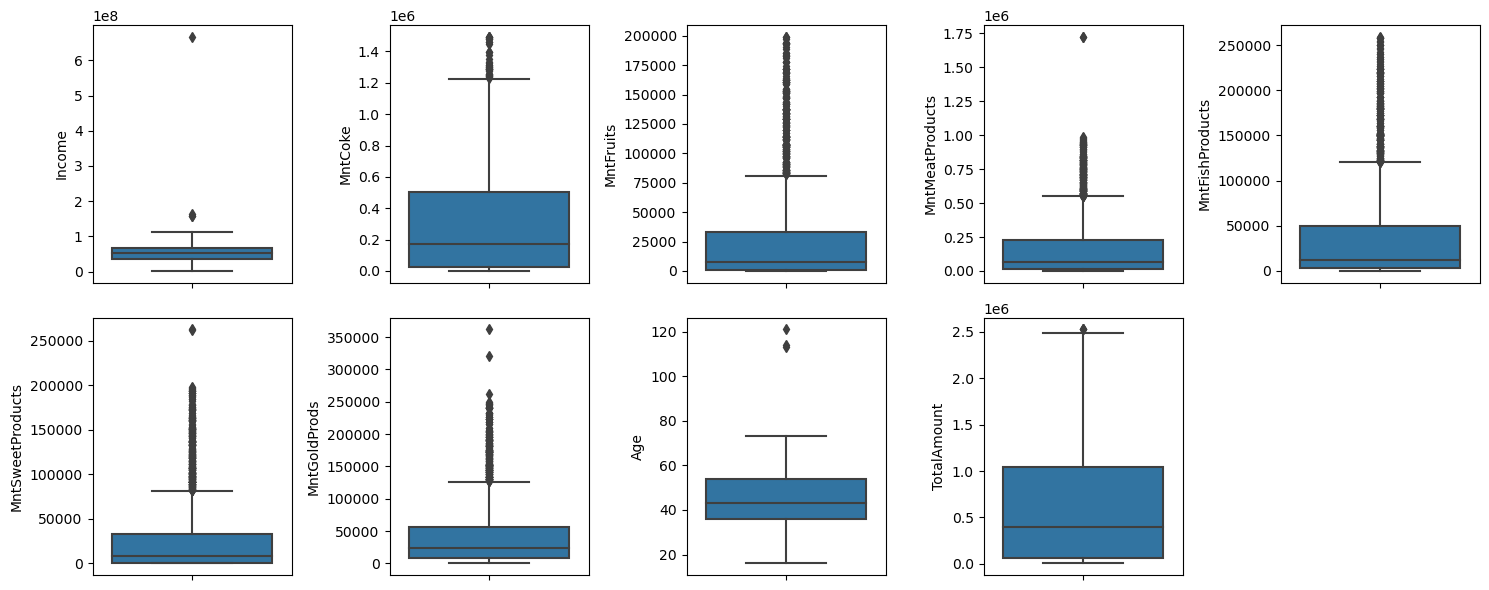

In [122]:
plt.figure(figsize=(15, 6))
for i in range(0, len(num)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=data[num[i]])
    plt.tight_layout()

* Most features have outlier.

In [123]:
print(f'Before handling outlier we have {len(data)} rows')

# Menghitung Q1, Q3, dan IQR
Q1 = data[num].quantile(0.25)
Q3 = data[num].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Membuat mask untuk menghilangkan outlier
mask = ((data[num] >= lower_bound) &
        (data[num] <= upper_bound)).all(axis = 1)
data = data[mask].reset_index(drop = True)

print(f'After handling outlier we have {len(data)} rows')

Before handling outlier we have 2229 rows
After handling outlier we have 1606 rows


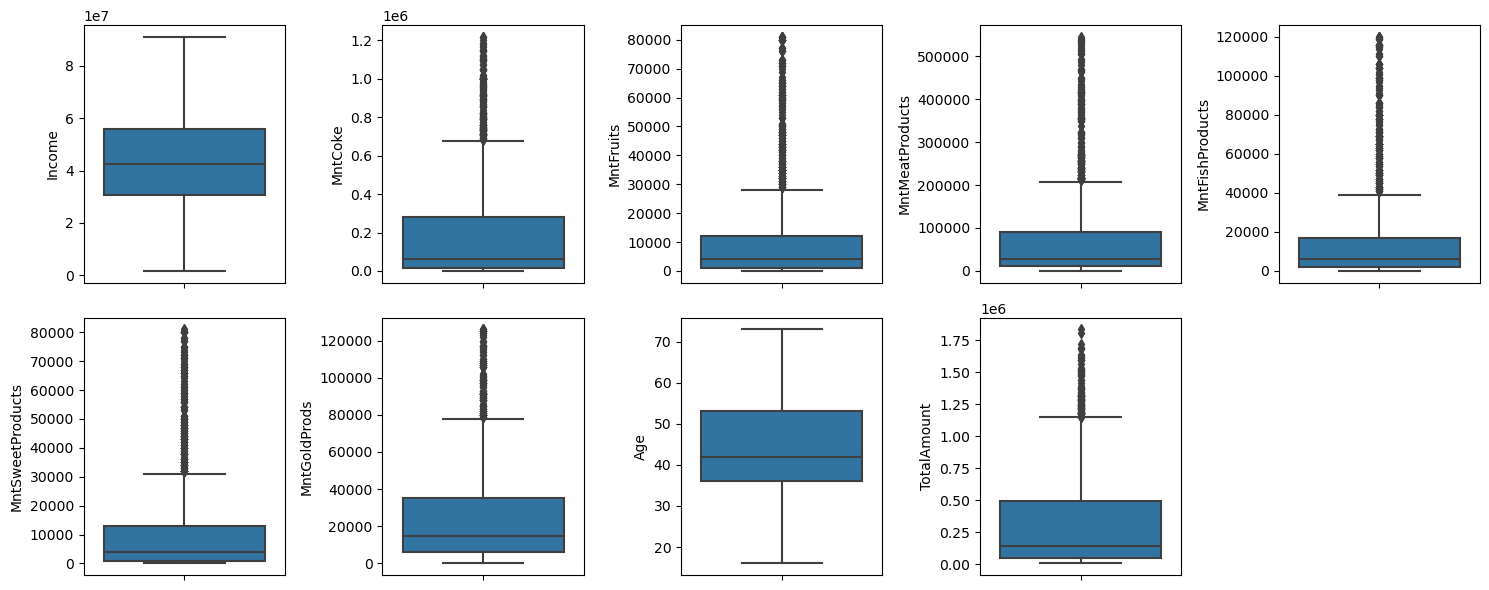

In [124]:
plt.figure(figsize=(15, 6))
for i in range(0, len(num)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=data[num[i]])
    plt.tight_layout()

### Handle Skewness

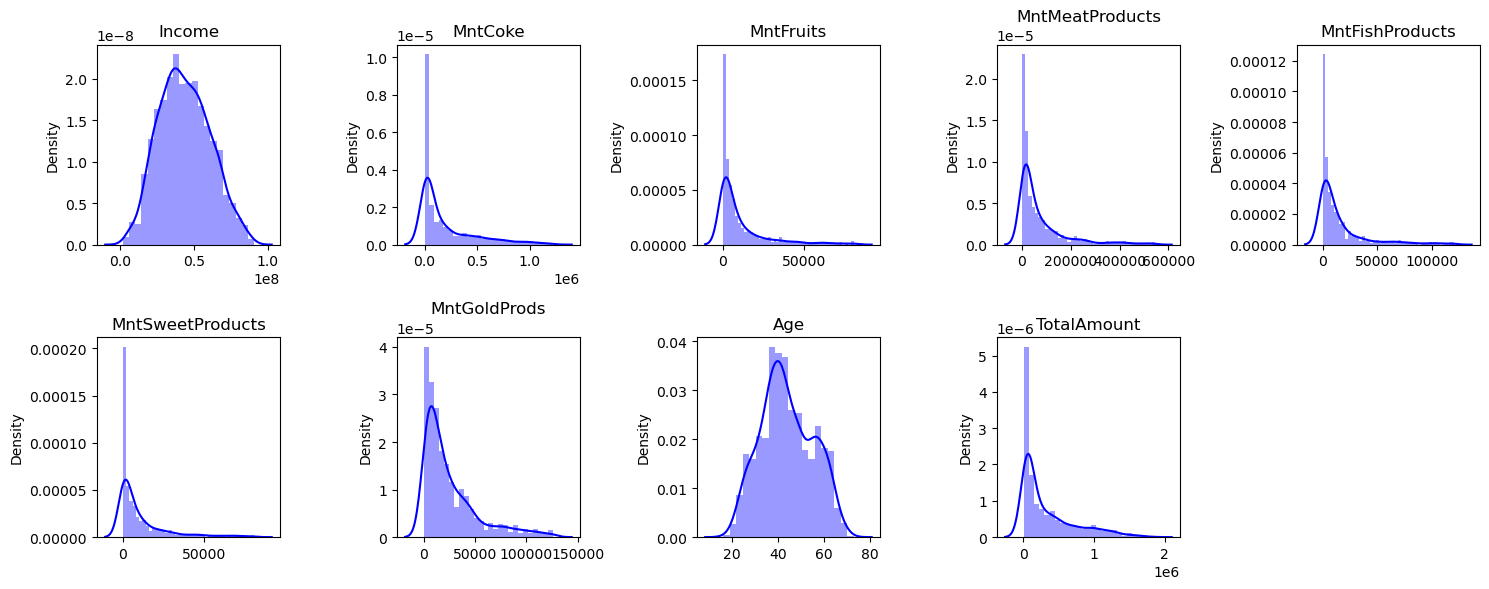

In [126]:
plt.figure(figsize=(15, 6))
for x in range(0, len(num)):
    plt.subplot(2, 5, x+1)
    sns.distplot(data[num[x]], color='b')
    plt.title(num[x], fontsize=12)
    plt.xlabel('')
    plt.tight_layout()

In [127]:
skewness = data[num].skew()
result   = pd.concat([pd.DataFrame({'Feature': skewness.index}), pd.DataFrame({'Skewness': skewness.values})], axis=1)
result   = result.sort_values(by='Skewness', ascending=False)
print(result)

            Feature  Skewness
4   MntFishProducts  2.423411
3   MntMeatProducts  2.370317
2         MntFruits  2.325407
5  MntSweetProducts  2.291648
1           MntCoke  1.689439
6      MntGoldProds  1.678055
8       TotalAmount  1.462103
0            Income  0.197092
7               Age  0.147488


All features > 1 will be handled

In [131]:
from scipy.stats import boxcox

skew_features    = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'TotalAmount']
data_boxcox      = data.copy()

# Apply Box-Cox transformation for each feature
for col in skew_features:
    data_boxcox[col], _ = boxcox(data[col] + 1)

In [132]:
skewness = data_boxcox[num].skew()
result   = pd.concat([pd.DataFrame({'Feature': skewness.index}), pd.DataFrame({'Skewness': skewness.values})], axis=1)
result   = result.sort_values(by='Skewness', ascending=False)
print(result)

            Feature  Skewness
0            Income  0.197092
7               Age  0.147488
3   MntMeatProducts  0.003324
8       TotalAmount -0.000088
1           MntCoke -0.044385
6      MntGoldProds -0.054505
2         MntFruits -0.348202
5  MntSweetProducts -0.360113
4   MntFishProducts -0.367773


### Scaling

In [138]:
data = data_boxcox.copy()

Then we will scale features price and totalamount

In [139]:
from sklearn.preprocessing import MinMaxScaler

features_to_scale       = ['Income', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'TotalAmount', 'Recency']
scaler                  = MinMaxScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

In [140]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,1606.0,2.493151,1.039837,0.0,2.000000,2.000000,3.000000,4.0
Marital_Status,1606.0,0.656912,0.700671,0.0,0.000000,1.000000,1.000000,2.0
Income,1606.0,0.471634,0.192724,0.0,0.326525,0.458628,0.607889,1.0
Recency,1606.0,0.495302,0.292820,0.0,0.242424,0.494949,0.747475,1.0
MntCoke,1606.0,0.612857,0.202175,0.0,0.452794,0.599419,0.779862,1.0
MntFruits,1606.0,0.451628,0.285451,0.0,0.342859,0.490920,0.641912,1.0
MntMeatProducts,1606.0,0.733062,0.122298,0.0,0.640746,0.721107,0.826133,1.0
MntFishProducts,1606.0,0.450932,0.280541,0.0,0.369476,0.489576,0.632065,1.0
MntSweetProducts,1606.0,0.451984,0.291176,0.0,0.349669,0.497723,0.659887,1.0
MntGoldProds,1606.0,0.526969,0.207983,0.0,0.384856,0.515532,0.672648,1.0


## MODELING

In [141]:
datamod = data.copy()

In [148]:
datamod.shape

(1606, 26)

In [146]:
datamod.head()

,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Children,TotalAmount,TotalPurchases,TotalCampaign
0,2,0,0.500140,0.383838,0.432102,0.342859,0.590387,0.369476,0.349669,0.384856,2,1,1,2,5,0,0,0,0,0,0,60,2,0.285447,11,0
1,2,0,0.783415,0.262626,0.838018,0.891854,0.858512,0.982254,0.737495,0.711967,1,8,2,10,4,0,0,0,0,0,0,48,0,0.854190,25,0
2,2,0,0.279318,0.262626,0.432102,0.490920,0.691777,0.555581,0.463566,0.362850,2,2,0,4,6,0,0,0,0,0,0,30,1,0.399639,14,0
3,4,1,0.634093,0.949495,0.717326,0.865516,0.851615,0.800670,0.781204,0.515532,5,5,3,6,5,0,0,0,0,0,0,33,1,0.751003,24,0
4,3,0,0.681401,0.161616,0.866907,0.860846,0.834288,0.000000,0.863523,0.504402,2,6,4,10,6,0,0,0,0,0,0,46,1,0.840558,28,0


### PCA

In [142]:
from sklearn.decomposition import PCA

pca   = PCA(n_components = 4)
pca.fit(datamod)
pcatf = pca.transform(datamod)
pcadf = pd.DataFrame(pcatf, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
pcadf.describe()

,pc1,pc2,pc3,pc4
count,1.606000e+03,1.606000e+03,1.606000e+03,1.606000e+03
mean,-1.893601e-15,-1.070681e-15,-1.946692e-16,1.504262e-16
std,1.148415e+01,7.597842e+00,2.786975e+00,1.510828e+00
min,-2.743187e+01,-1.638044e+01,-1.021607e+01,-6.580936e+00
25%,-8.264405e+00,-5.641898e+00,-1.414153e+00,-7.321750e-01
50%,-1.228236e+00,-1.580512e+00,3.936478e-01,4.780917e-02
75%,8.766358e+00,5.093313e+00,1.696799e+00,7.258142e-01
max,2.939240e+01,2.382986e+01,1.922379e+01,7.395359e+00


### Scree Plot

Explained variance: [131.88574537  57.72719987   7.76722776   2.28260153]
Explained variance ratio: [0.64089756 0.28052479 0.03774477 0.01109228]


<BarContainer object of 4 artists>

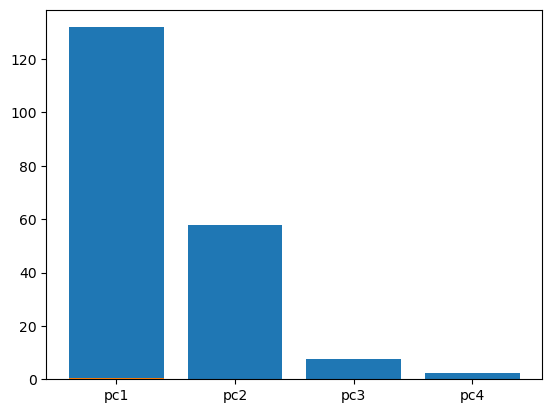

In [143]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

plt.bar(['pc1', 'pc2', 'pc3', 'pc4'], pca.explained_variance_)
plt.bar(['pc1', 'pc2', 'pc3', 'pc4'], pca.explained_variance_ratio_)

### Pair Plot

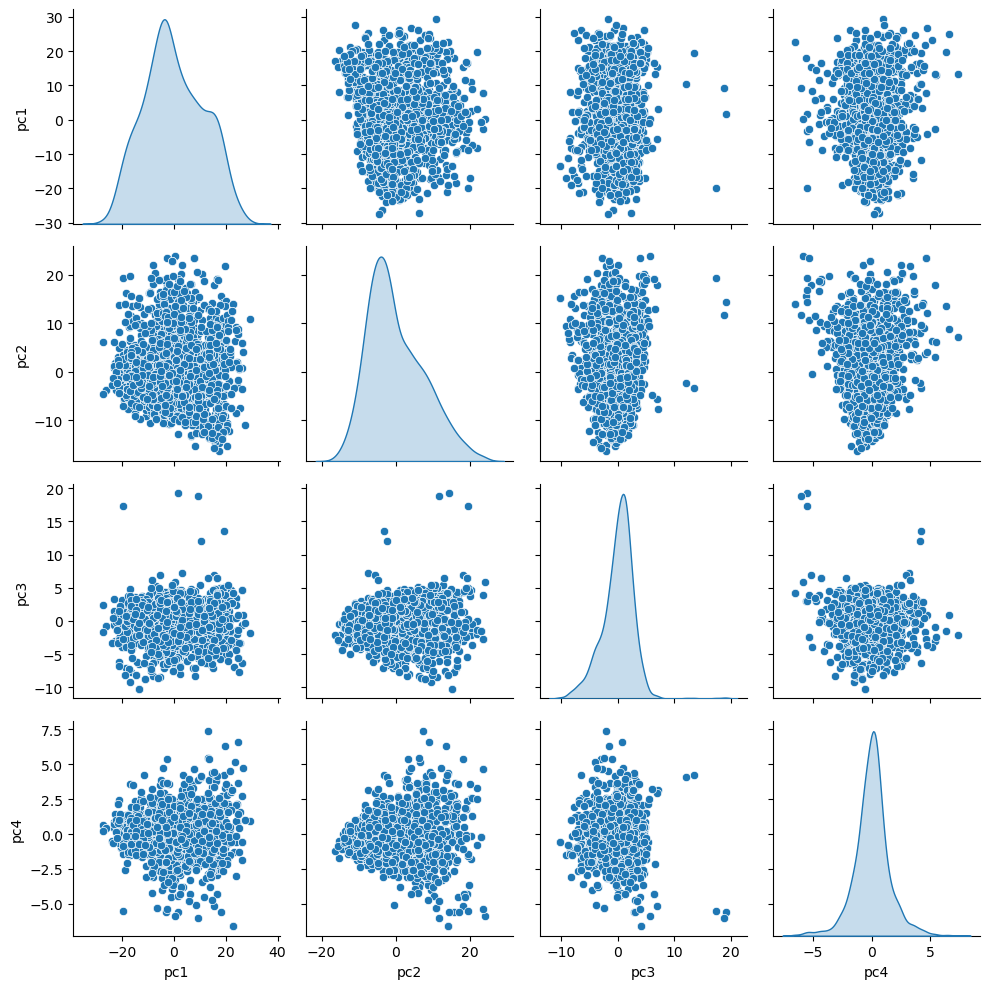

In [144]:
sns.pairplot(pcadf, diag_kind = 'kde')
plt.tight_layout()

### Inertia Elbow  Plot

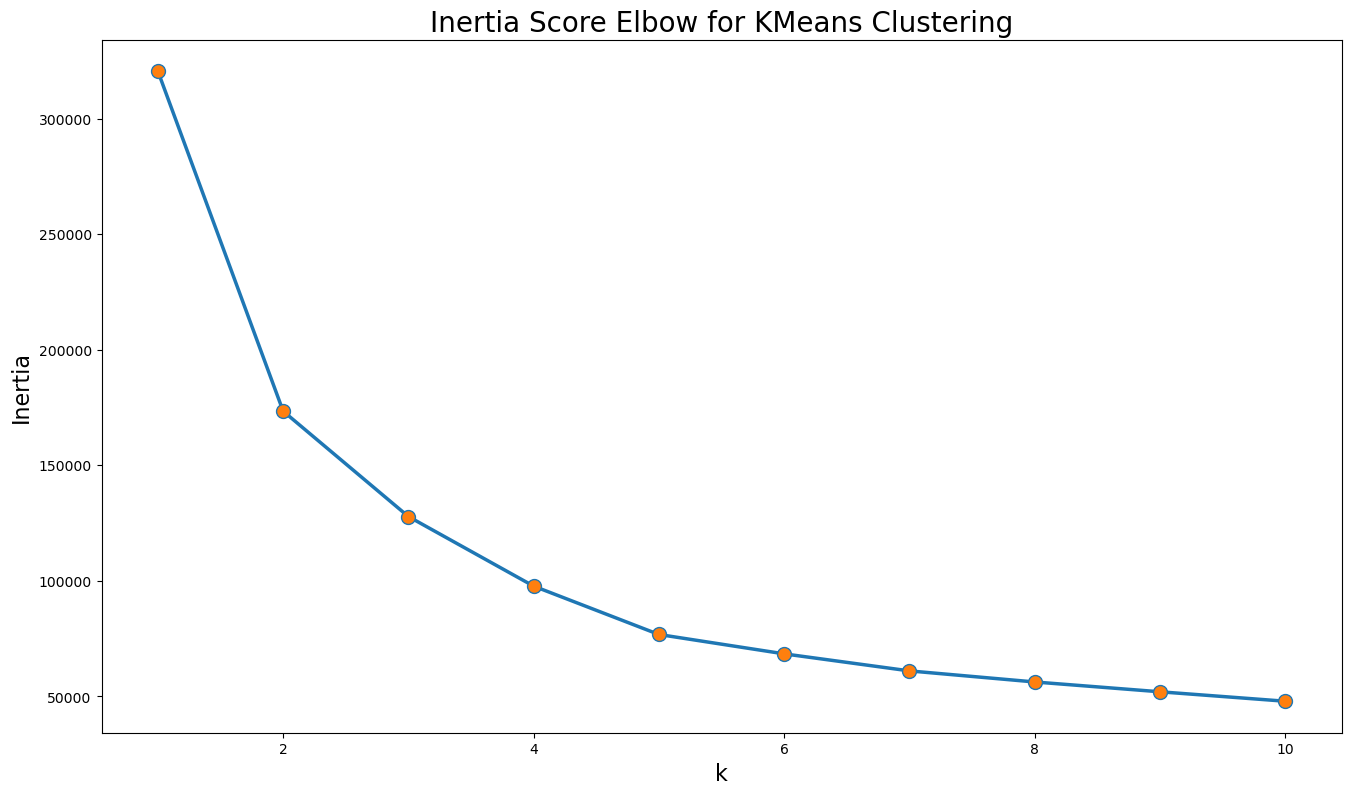

In [145]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10,
                    max_iter=200, random_state=100)
    kmeans.fit(pcadf)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16, 9))
plt.plot(range(1, 11),
         inertia,
         color='tab:blue',
         linewidth=2.5,
         marker='o',
         markerfacecolor='tab:orange',
         markersize=10)
plt.xlabel('k', fontsize=16)
plt.ylabel('Inertia', fontsize=16)
plt.style.use('ggplot')
plt.title('Inertia Score Elbow for KMeans Clustering', fontsize=20)
plt.show()

We can see that after 4, there is no significant change.

In [147]:
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    45.890456
1    26.285859
2    23.549234
3    21.405665
4    10.912235
5    10.774036
6     7.847433
7     7.547130
8     7.848848
9          NaN
dtype: float64

It appears that the inertia values decrease rapidly until 4 clusters and then start to level off.

### Distortion Score Elbow

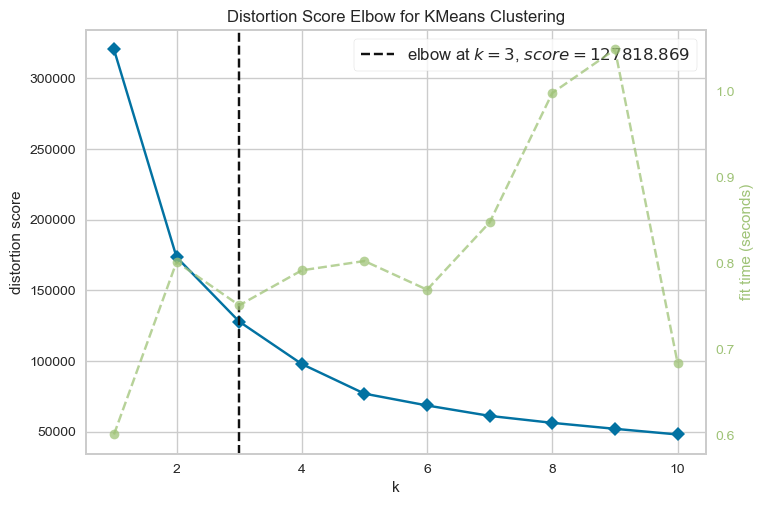

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [149]:
from yellowbrick.cluster import KElbowVisualizer

model      = KMeans(init = 'k-means++', n_init = 10, max_iter = 200, random_state = 400)
visualizer = KElbowVisualizer(model, k = (1, 11), metric = 'distortion', timings = True, locate_elbow = True)
visualizer.fit(pcadf)
visualizer.show()

The best cluster based on distortion score is 3.

### Silhouette Score Elbow

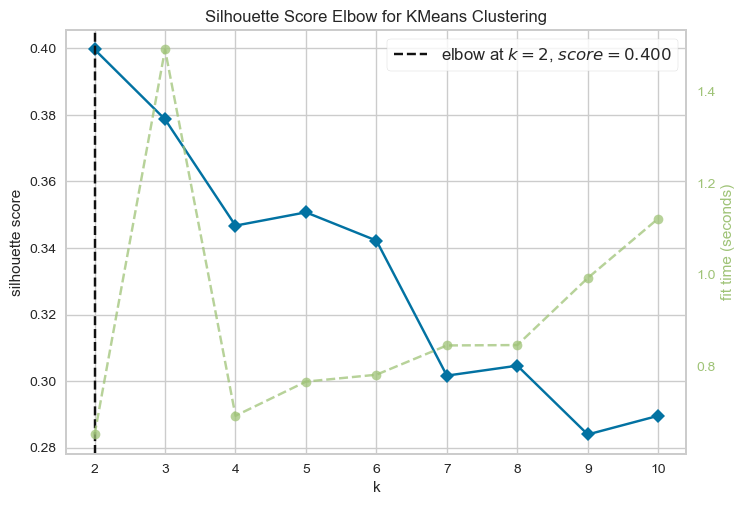

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [150]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(init = 'k-means++', n_init = 10, max_iter = 200, random_state = 400)
visualizer = KElbowVisualizer(model, k = (2, 11), metric = 'silhouette', timings = True, locate_elbow = True)
visualizer.fit(pcadf)
visualizer.show()

### Silhouette Coefficient Plot

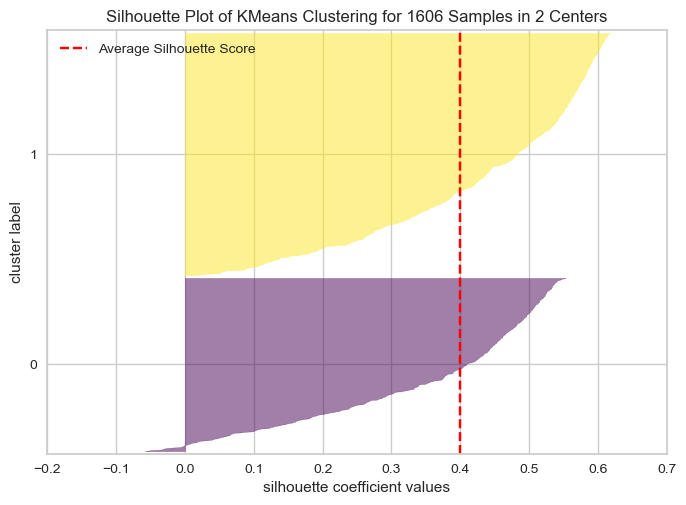

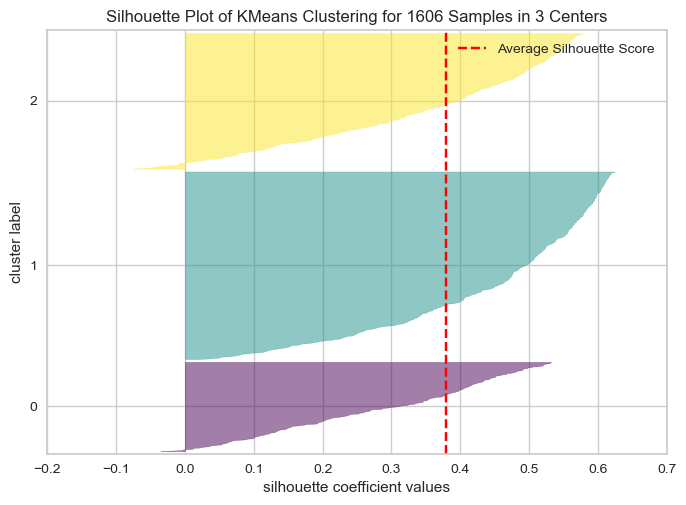

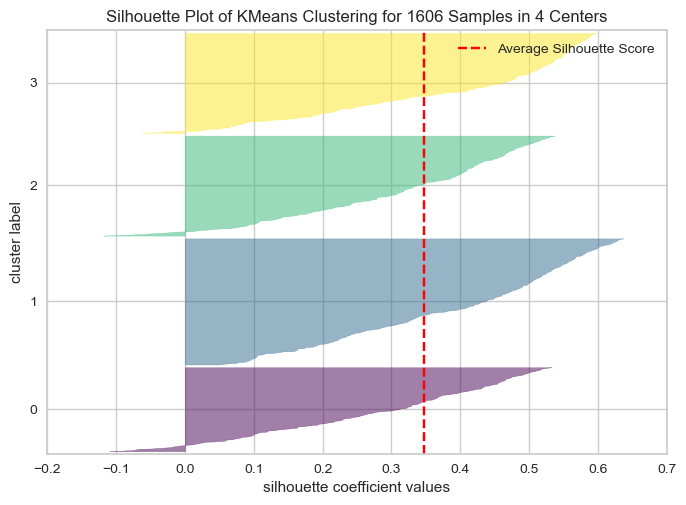

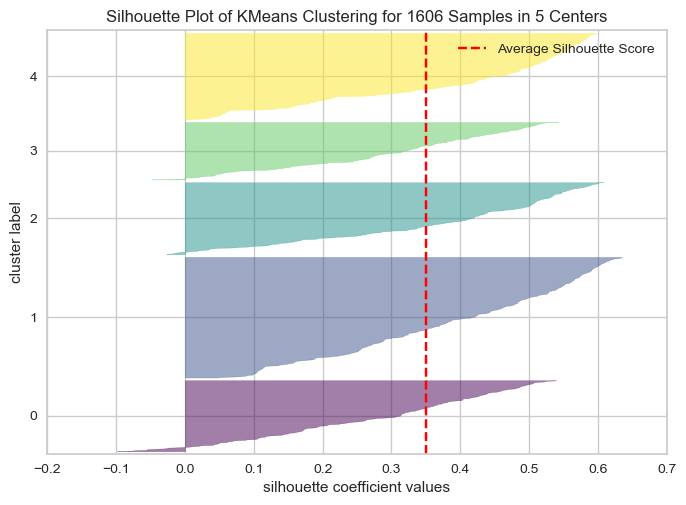

In [151]:
from yellowbrick.cluster import SilhouetteVisualizer

for i in [2, 3, 4, 5]:
    model = KMeans(i, init = 'k-means++', n_init = 10, max_iter = 200, random_state = 400)
    visualizer = SilhouetteVisualizer(model, colors = 'viridis')
    visualizer.fit(pcadf)        
    visualizer.show()

### Silhouette Score Plot

In [152]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2, 10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=100)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=['n_clusters', 'silhouette_score'])
    pivot_km = pd.pivot_table(result, index='n_clusters', values='silhouette_score')

    plt.figure(figsize=(8, 9))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='viridis')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering', fontsize=20, fontweight='bold')
    plt.show()

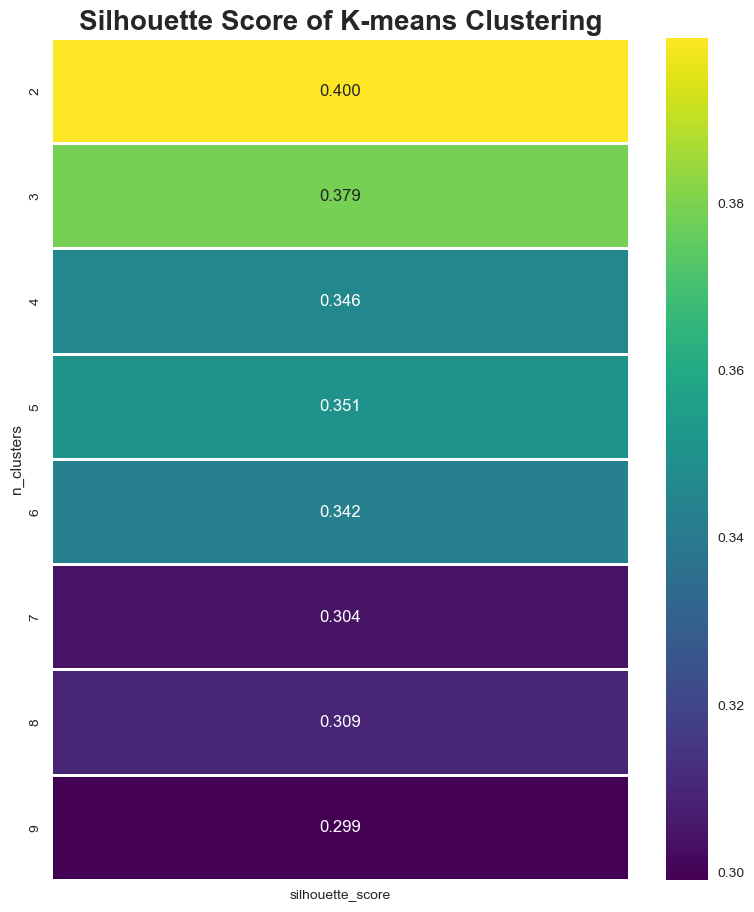

In [153]:
visualize_silhouette_layer(pcadf)

2 is the best k according to silhouette coefficient values, but it is too few for our customer segmentation. thus, we prefer to 3 since it is the 2nd best k.

### Fit The Model

In [154]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=200,
            random_state=100)
km.fit(datamod.values)

KMeans(max_iter=200, n_clusters=3, n_init=10, random_state=100)

### Group By on Cluster

In [155]:
# Labels
datamod['cluster'] = km.labels_
datamod.groupby('cluster').agg(['std', 'mean', 'median'])

Education                  Marital_Status                     Income  \
              std      mean median            std      mean median       std   
cluster                                                                        
0        1.009927  2.696970    2.0       0.748734  0.687500    1.0  0.175903   
1        0.920073  2.747126    2.0       0.707142  0.724138    1.0  0.151217   
2        1.052241  2.224658    2.0       0.657128  0.602740    1.0  0.160148   

                              Recency                       MntCoke            \
             mean    median       std      mean    median       std      mean   
cluster                                                                         
0        0.516891  0.526468  0.297468  0.510044  0.525253  0.176138  0.651328   
1        0.620684  0.620741  0.293561  0.484616  0.484848  0.102614  0.825650   
2        0.367848  0.353716  0.289041  0.489733  0.474747  0.152089  0.483590   

                  MntFruits                     MntMeatProducts            \
           median       std      mean    median             std      mean   
cluster                                                                     
0        0.653522  0.297256  0.442309  0.490920        0.123555  0.737580   
1        0.839348  0.311811  0.556636  0.635297        0.076186  0.844342   
2        0.469983  0.249065  0.408310  0.456659        0.100143  0.676745   

                  MntFishProducts                     MntSweetProducts  \
           median             std      mean    median              std   
cluster                                                                  
0        0.732870        0.300637  0.436153  0.489576         0.316721   
1        0.847562        0.295974  0.548066  0.592334         0.306654   
2        0.667049        0.245579  0.415317  0.441996         0.250691   

                            MntGoldProds                      \
             mean    median          std      mean    median   
cluster                                                        
0        0.425288  0.463566     0.212164  0.527247  0.515532   
1        0.555539  0.634538     0.190291  0.663511  0.669620   
2        0.421927  0.463566     0.179695  0.461677  0.467248   

        NumDealsPurchases                  NumWebPurchases                   \
                      std      mean median             std      mean median   
cluster                                                                       
0                1.612868  2.320076    2.0        2.454888  3.509470    3.0   
1                2.540519  4.155172    4.0        2.229875  6.218391    6.0   
2                1.030603  1.863014    2.0        1.268400  2.134247    2.0   

        NumCatalogPurchases                  NumStorePurchases            \
                        std      mean median               std      mean   
cluster                                                                    
0                  2.027554  1.744318    1.0          2.558082  4.971591   
1                  2.276367  3.140805    2.0          2.896248  7.741379   
2                  1.135382  0.660274    0.0          1.543531  3.384932   

               NumWebVisitsMonth                  AcceptedCmp3            \
        median               std      mean median          std      mean   
cluster                                                                    
0          4.0          2.222623  5.429924    6.0     0.208496  0.045455   
1          7.0          2.257825  6.152299    6.0     0.276783  0.083333   
2          3.0          1.857625  6.367123    7.0     0.259661  0.072603   

               AcceptedCmp4                  AcceptedCmp5                   \
        median          std      mean median          std      mean median   
cluster                                                                      
0          0.0     0.261797  0.073864    0.0     0.149174  0.022727    0.0   
1          0.0     0.367986  0.160920    0.0  

In [156]:
datamod.groupby('cluster').count()

,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Children,TotalAmount,TotalPurchases,TotalCampaign
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,528,528,528,528,528,528,528,528,528,528,528,528,528,528,528,528,528,528,528,528,528,528,528,528,528,528
1,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348
2,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730


### Customer Segmentation

In [157]:
km.cluster_centers_

array([[2.69696970e+00, 6.87500000e-01, 5.16890717e-01, 5.10043618e-01,
        6.51327997e-01, 4.42309108e-01, 7.37580381e-01, 4.36152658e-01,
        4.25288118e-01, 5.27246615e-01, 2.32007576e+00, 3.50946970e+00,
        1.74431818e+00, 4.97159091e+00, 5.42992424e+00, 4.54545455e-02,
        7.38636364e-02, 2.27272727e-02, 3.03030303e-02, 7.57575758e-03,
        8.90151515e-02, 5.66174242e+01, 1.22537879e+00, 6.04883743e-01,
        1.79753788e+01, 1.79924242e-01],
       [2.74712644e+00, 7.24137931e-01, 6.20683857e-01, 4.84616278e-01,
        8.25649706e-01, 5.56636019e-01, 8.44341963e-01, 5.48065892e-01,
        5.55538519e-01, 6.63511356e-01, 4.15517241e+00, 6.21839080e+00,
        3.14080460e+00, 7.74137931e+00, 6.15229885e+00, 8.33333333e-02,
        1.60919540e-01, 5.17241379e-02, 4.88505747e-02, 2.01149425e-02,
        1.46551724e-01, 4.21522989e+01, 1.20689655e+00, 8.15454702e-01,
        2.74080460e+01, 3.64942529e-01],
       [2.22465753e+00, 6.02739726e-01, 3.67847555e-01

In [158]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=4)

pca.fit(datamod)
pcatf            = pca.transform(datamod)
pcadf            = pd.DataFrame(data=pcatf, columns=['pc1', 'pc2', 'pca3', 'pca4'])
pcadf['cluster'] = datamod['cluster']
pcadf.sample(n=5, random_state=100)

,pc1,pc2,pca3,pca4,cluster
1292,1.877198,3.209710,3.195549,0.150000,1
1604,16.142970,5.980846,-4.407741,0.199940,0
1267,-3.720587,-3.429959,1.816342,-0.845638,2
1379,-21.834277,-2.366659,-1.390513,-0.286254,2
904,-4.488247,-7.432669,-0.431626,-0.248341,2


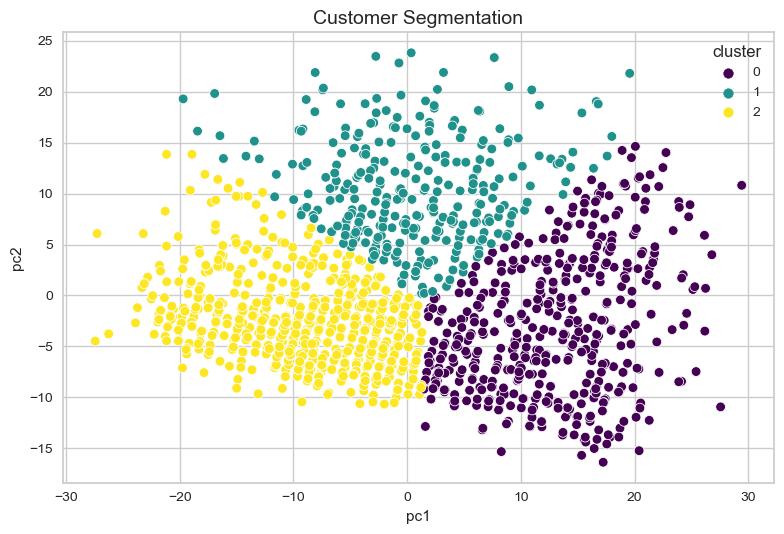

In [159]:
sns.scatterplot(data=pcadf,
                x='pc1',
                y='pc2',
                hue='cluster',
                palette='viridis')
plt.title('Customer Segmentation', fontsize=14)
plt.tight_layout()
plt.show()

### Segment Visualization

In [160]:
datanew            = data.copy()
datanew['cluster'] = km.labels_

In [161]:
datanew.head()

,Education,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,Children,TotalAmount,TotalPurchases,TotalCampaign,cluster
0,2,0,0.500140,0.383838,0.432102,0.342859,0.590387,0.369476,0.349669,0.384856,2,1,1,2,5,0,0,0,0,0,0,60,2,0.285447,11,0,0
1,2,0,0.783415,0.262626,0.838018,0.891854,0.858512,0.982254,0.737495,0.711967,1,8,2,10,4,0,0,0,0,0,0,48,0,0.854190,25,0,1
2,2,0,0.279318,0.262626,0.432102,0.490920,0.691777,0.555581,0.463566,0.362850,2,2,0,4,6,0,0,0,0,0,0,30,1,0.399639,14,0,2
3,4,1,0.634093,0.949495,0.717326,0.865516,0.851615,0.800670,0.781204,0.515532,5,5,3,6,5,0,0,0,0,0,0,33,1,0.751003,24,0,1
4,3,0,0.681401,0.161616,0.866907,0.860846,0.834288,0.000000,0.863523,0.504402,2,6,4,10,6,0,0,0,0,0,0,46,1,0.840558,28,0,1


In [183]:
features     = ['Income', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds', 'Age', 'TotalAmount', 'TotalPurchases', 'cluster']
data_summary = datanew[features]
summary      = round(data_summary.groupby('cluster').agg(['median']), 2)
summary

,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,TotalAmount,TotalPurchases
,median,median,median,median,median,median,median,median,median,median,median
cluster,,,,,,,,,,,
0,0.53,0.53,0.65,0.49,0.73,0.49,0.46,0.52,57.0,0.63,17.0
1,0.62,0.48,0.84,0.64,0.85,0.59,0.63,0.67,42.0,0.83,27.0
2,0.35,0.47,0.47,0.46,0.67,0.44,0.46,0.47,36.0,0.43,14.0


In [167]:
cluster_percent               = data_summary['cluster'].value_counts().reset_index()
cluster_percent.columns       = ['cluster', 'count']
cluster_percent['percentage'] = round((cluster_percent['count'] / len(data_summary)) * 100, 2)
cluster_percent               = cluster_percent.sort_values(by=['cluster']).reset_index(drop=True)
cluster_percent

,cluster,count,percentage
0,0,528,32.88
1,1,348,21.67
2,2,730,45.45


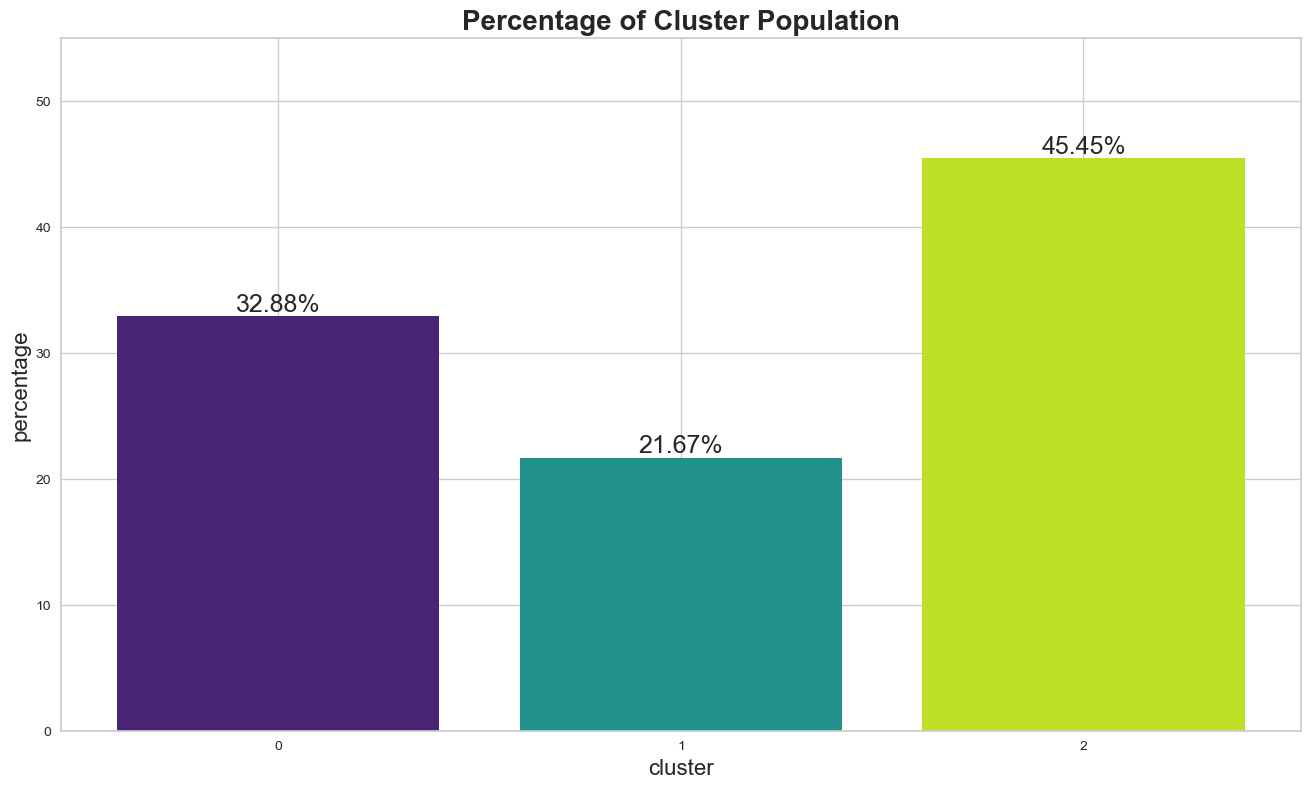

In [190]:
colors = plt.cm.viridis([0.1, 0.5, 0.9])
fig, ax = plt.subplots(figsize=(16, 9))
bars = plt.bar(x=cluster_percent['cluster'], height=cluster_percent['percentage'], color=colors)

plt.title('Percentage of Cluster Population', fontsize=20, fontweight='bold')
plt.bar_label(ax.containers[0], fmt='%.2f%%', fontsize=18)
plt.xlabel('cluster', fontsize=16)
plt.xticks(range(0, 3))
plt.ylabel('percentage', fontsize=16)
plt.ylim(0, 55)
plt.show()

Cluster Distribution: Cluster 0 has 528 data points (32.88%), Cluster 1 has 348 data points (21.67%), and Cluster 2 is the highest count with 730 data points (45.45%).

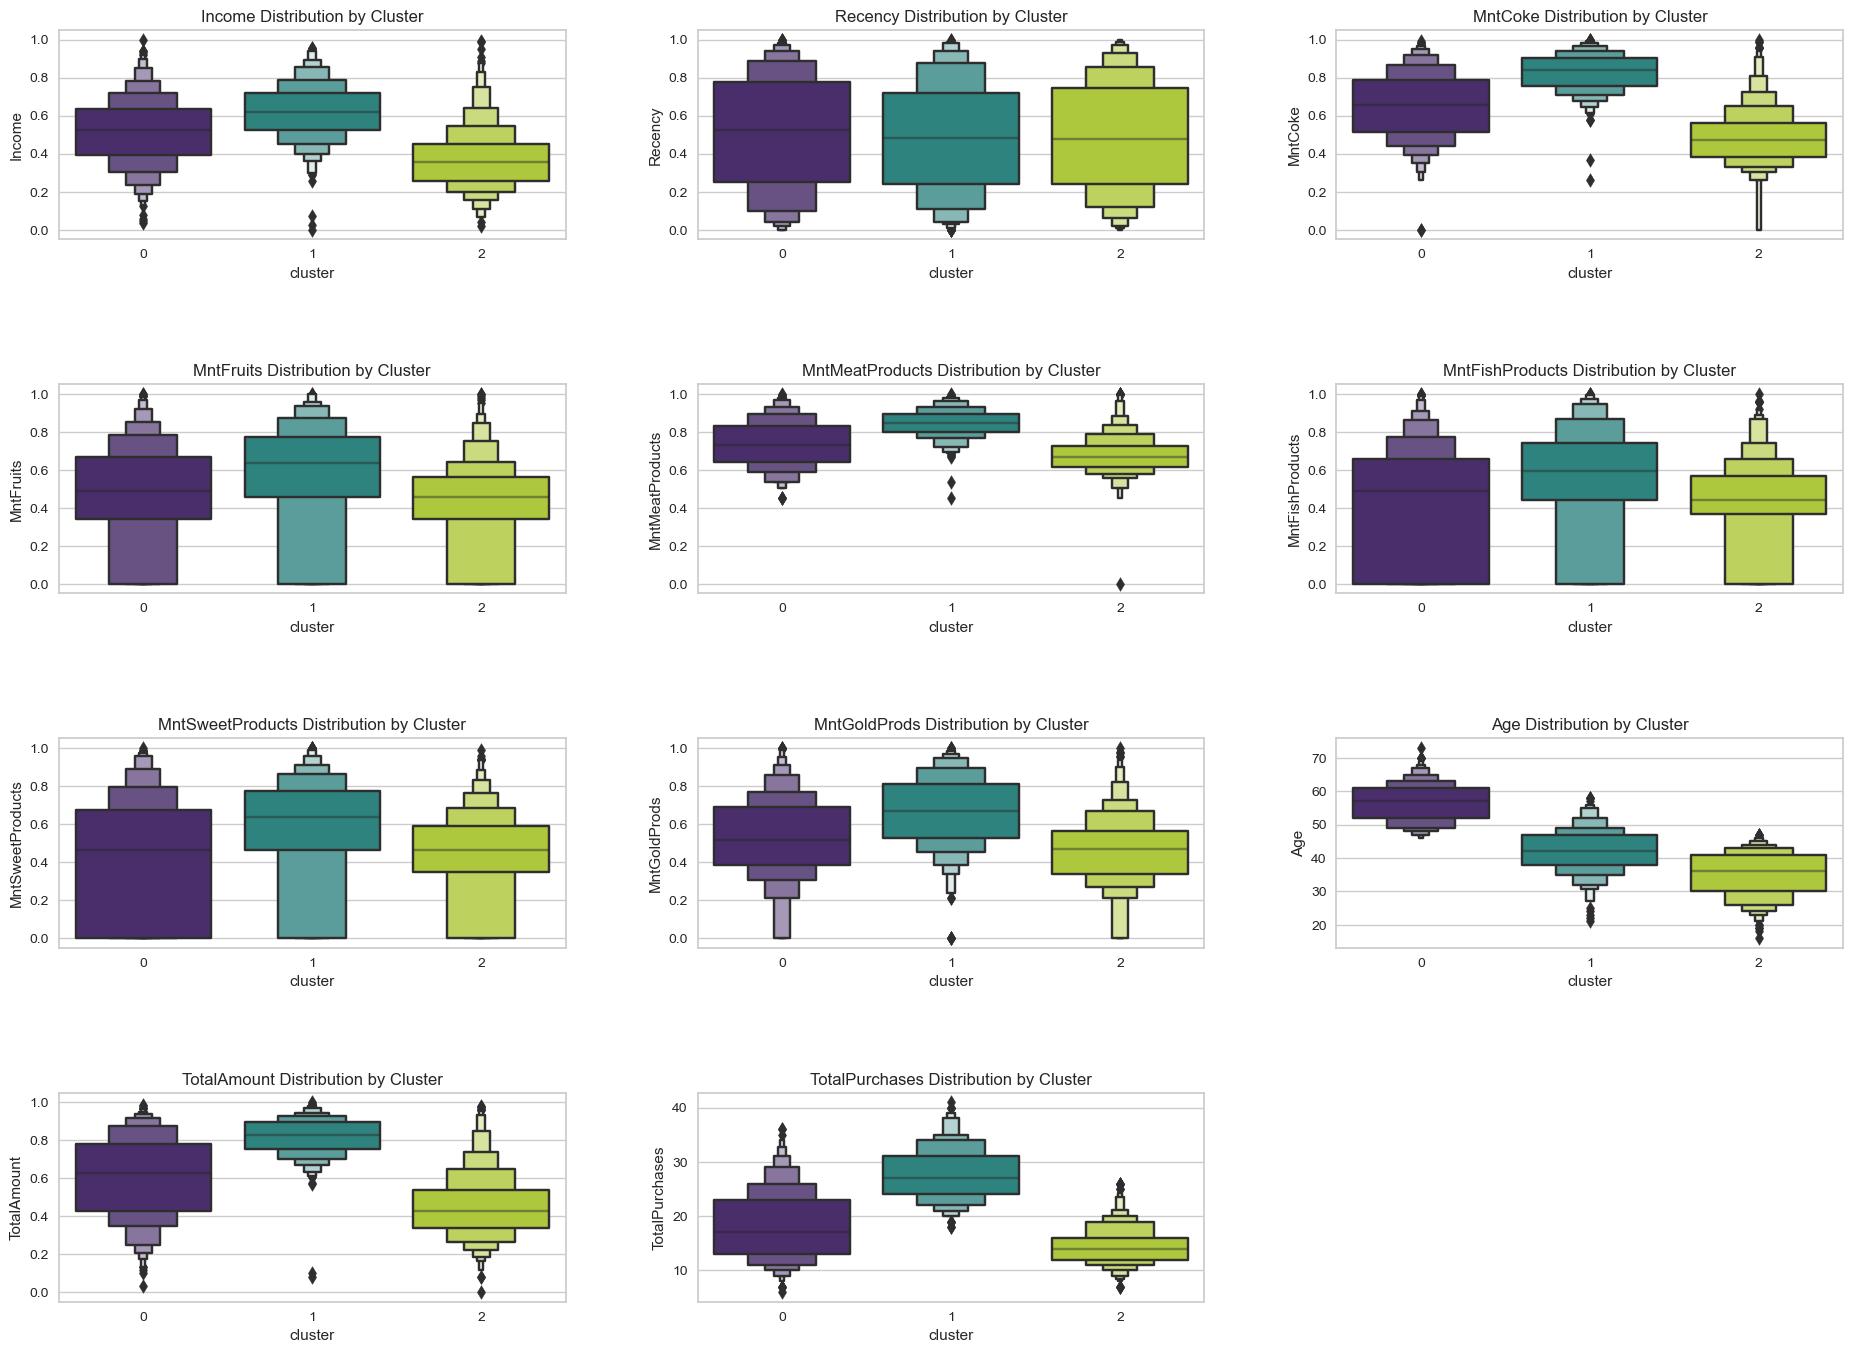

In [189]:
features     = ['Income', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds', 'Age', 'TotalAmount', 'TotalPurchases']
colors = plt.cm.viridis([0.1, 0.5, 0.9])
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
    plt.subplot(4, 3, i+1)
    sns.boxenplot(x='cluster', y=data[features[i]], data=datanew, palette=colors).set(title=f'{features[i]} Distribution by Cluster')
    plt.tight_layout(pad=5)
plt.show()

## **INSIGHT**

**Cluster 0:**
* Median income is 53% of the overall median.
* Median recency is 53% of the overall median, indicating relatively recent customers.
* Higher spending on Meat Products, Fish Products, and Gold Products compared to the overall median.
* Lower spending on Coke, Fruits, and Sweet Products compared to the overall median.
* Median age is 57, which is higher than the overall median.
* Total Amount and Total Purchases are moderate in comparison to the overall median.

**Cluster 1:**
* Median income is 62% of the overall median.
* Median recency is 48% of the overall median, indicating relatively more recent customers.
* Higher spending on Coke, Fruits, Meat Products, and Gold Products compared to the overall median.
* Lower spending on Sweet Products and Fish Products compared to the overall median.
* Median age is 42, which is lower than the overall median.
* Total Amount and Total Purchases: Relatively higher than the overall median.

**Cluster 2:**
* Median income is 35% of the overall median.
* Median recency is 47% of the overall median, indicating relatively recent customers.
* Lower spending on all product categories compared to the overall median.
* Median age is 36, which is significantly lower than the overall median.
* Total Amount and Total Purchases: Lower than the overall median.

## **BUSINESS RECOMMENDATION**

**Cluster 0 Recommendation**
<br>1. Targeted Offers: Offer special discounts or loyalty rewards on Meat Products, Fish Products, and Gold Products to encourage repeat purchases from this cluster.
<br>2. Personalization: Tailor marketing campaigns to appeal to older customers, possibly with products and services that cater to their needs and preferences.
<br>3. Upselling and Cross-selling: Suggest complementary products to customers based on their previous purchases to increase their basket size.
<br>4. Customer Retention: Implement strategies to keep recent customers engaged and coming back for more, such as exclusive offers or personalized communication.

<br>**Cluster 1 Recommendation**
<br>1. Upselling Opportunities: Identify opportunities to upsell higher-value products, especially in the categories where customers already spend more (Coke, Fruits, Meat Products, Gold Products).
<br>2. Targeted Promotions: Focus on attracting younger customers through targeted marketing campaigns that appeal to their preferences and interests.
<br>3. Customer Engagement: Implement strategies to keep these recent customers engaged and coming back for repeat purchases, such as loyalty programs or limited-time offers.   

<br>**Cluster 2 Recommendation**
<br>1. Price Sensitivity: Recognize the price sensitivity of this cluster and offer competitive pricing and discounts to attract and retain these customers.
<br>2. Product Diversification: Introduce affordable product options and smaller pack sizes to cater to this cluster's preferences and budget.
<br>3. Promotional Strategies: Leverage social media and influencer marketing to reach and engage with younger audiences effectively.
<br>4. Customer Retention: Focus on building customer loyalty through personalized communications and incentives.